# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [95]:
#Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [96]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Shape of X_train (39209, 32, 32, 3)
Shape of y_train (39209,)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

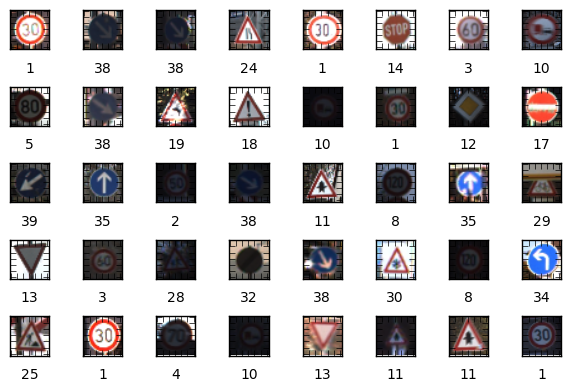

In [97]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import csv

'''
class_dict = {}
class_ids = []
sign_names = []
with open('signnames.csv', 'rt') as f:
    csvreader = csv.DictReader(f)
    for row in csvreader:
        class_ids.append(row['ClassId'])
        sign_names.append(row['SignName'])

class_dict['ClassId'] = class_ids
class_dict['SignName'] = sign_names
'''
fig, axes = plt.subplots(nrows=5, ncols=8)

for i, ax in enumerate(axes.flat, start=1):
    idx = random.randint(0, len(X_train))
    img = X_train[idx].squeeze()
    ax.imshow(img)
    #print(y_train[idx], '=', sign_names[class_ids.index(str(y_train[idx]))])
    ax.set_xlabel(y_train[idx])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.tight_layout()

plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

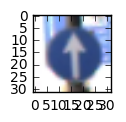

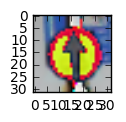

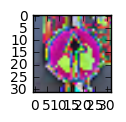

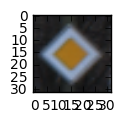

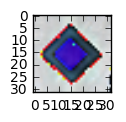

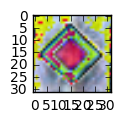

In [98]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

def preprocess(X_data):
    index = random.randint(0, len(X_data))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

    #Mean Subtraction
    #X -= np.mean(X, axis = 0)
    X_data -= (np.mean(X_data, axis=0)).astype(X_data.dtype)
    #X_test -= (np.mean(X_test, axis=0)).astype(X_train.dtype)

    #index = random.randint(0, len(X_train))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

    #Normalization
    #X /= np.std(X, axis = 0)
    X_data = X_data / np.std(X_data, axis=0)
    #X_test = X_test / np.std(X_test, axis=0)

    #index = random.randint(0, len(X_train))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    
    return X_data

X_train = preprocess(X_train)
X_test = preprocess(X_test)

#print("Shape of X_train", X_train.shape)
#print("Shape of X_test", X_test.shape)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Preprocessing of input data is an important step to improve the efficiency & accuracy of the model.  Common techniques adopted are Converting to gray scale (to handle statistical invariants & reduce not very useful datasets), Mean subtraction to center the cloud of feature data around the origin in every dimension, Normalizing the image data by diving each dimension by its standard deviation to ensure that the features to have similar range that our gradients will remain under control.
 
Following Image Preprocessing are done in this model (along with its reasons):
1) Mean Subtraction - to center the cloud of feature data around the origin in every dimension
2) Normalization - to ensure that the features to have similar range that our gradients will remain under control
 

In [99]:
### Generate data additional data (OPTIONAL!)
### Feel free to use as many code cells as needed.
import cv2

def generateImg(img):
    
    rot_range = np.random.randint(10, high=50)
    shear_range = np.random.randint(1, high=10)
    trans_range = np.random.randint(1, high=5)
    gray = np.random.randint(0, high=100)%2
    
    rot_angle = np.random.normal(rot_range)-rot_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_angle,1)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    img = cv2.warpAffine(img,Trans_M,(cols,rows))

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    #if gray == 1:
    #    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

qty = 500 #np.ceil(len(X_train)/10)
for i in range(qty):
    if i%10==0:
        print('iteration', i+1)
    new_img = X_train[i].copy()
    new_img = generateImg(new_img)
    X_train = np.append(X_train, new_img[None, :], axis=0)
    y_train = np.append(y_train, y_train[i])
    
print("After generating additional images")
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)


Shape of X_train (39209, 32, 32, 3)
Shape of X_test (12630, 32, 32, 3)
Shape of y_train (39209,)
Shape of y_test (12630,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
ite

In [100]:
### and split the data into training/validation/testing sets here.

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

n_train = len(X_train)
n_validation = len(X_validation)
n_test = len(X_test)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Training, Validation & Testing Data:
For training a neural network model, we need datasets for training, validating and finally testing the model. 

▸ We were provided with training and testing datasets.  
▸ From the training data set provided, a small subset (20%) is randomly picked and kept aside as validation set.  The data is split using sklearn's train_test_split function.

Generated Additional Data:
Additional set of traffic sign images are generated from existing training set data. The original image data are mostly well defined and properly oriented images, but in real world, the traffic sign images could have been dis-oriented due to various reasons. Hence an additional set of images got created by rotating, transforming and sheer transforming a small set (30%) of original images. Used OpenCV Geometrical transformation function warpAffine to generate new transformed images. 

Also, if the distribution of different types of samples are not uniformly distributed in the given training set, the model would be trained biased towards the samples that are present in higher number.  By generating additional samples, this type of bias could be reduced.  If needed, the histogram of the samples could be analysed and samples that are very less in the samples could be generated to even out the sample distribution.


In [101]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

n_classes = 43
mu = 0
sigma = 0.1

layer_depth = {
    'layer_1': 6,
    'layer_2': 16,
    'layer_3_fc': 400,
    'layer_4_fc': 120,
    'layer_5_fc': 84
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal([5, 5, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal([5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
    'layer_3_fc': tf.Variable(tf.truncated_normal([layer_depth['layer_3_fc'], layer_depth['layer_4_fc']], mean = mu, stddev = sigma)),
    'layer_4_fc': tf.Variable(tf.truncated_normal([layer_depth['layer_4_fc'], layer_depth['layer_5_fc']], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([layer_depth['layer_5_fc'], n_classes], mean = mu, stddev = sigma))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3_fc': tf.Variable(tf.zeros(layer_depth['layer_3_fc'])),
    'layer_4_fc': tf.Variable(tf.zeros(layer_depth['layer_4_fc'])),
    'layer_5_fc': tf.Variable(tf.zeros(layer_depth['layer_5_fc'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def myCnn(x):    

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    print('x.shape = ', x.get_shape())
    conv1 = tf.nn.conv2d(x, weights['layer_1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['layer_1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)
    print('conv1.shape = ', conv1.get_shape())

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv1.pool.shape = ', conv1.get_shape())

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['layer_2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['layer_2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    print('conv2.shape = ', conv2.get_shape())

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv2.pool.shape = ', conv2.get_shape())

    # Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    print('conv2.flatten.shape = ', conv2.get_shape())
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    conv3_fc = tf.add(tf.matmul(conv2, weights['layer_3_fc']), biases['layer_4_fc'])
    print('conv3_fc.shape = ', conv3_fc.get_shape())
    
    # Activation.
    conv3_fc = tf.nn.relu(conv3_fc)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    conv4_fc = tf.add(tf.matmul(conv3_fc, weights['layer_4_fc']), biases['layer_5_fc'])
    print('conv4_fc.shape = ', conv4_fc.get_shape())
    
    # Activation.
    conv4_fc = tf.nn.relu(conv4_fc)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    out = tf.add(tf.matmul(conv4_fc, weights['out']), biases['out'])
    print('out.shape = ', out.get_shape())
    
    return out #logits as output

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture of this model is,

Input => Images of size 32x32 with 3 color channels are sent to first layer

Layer-1 (Convolution, Activation, Max Pooling) => Convoluted to 28x28x6, then to 14x14x6 through Pooling with RELU activation in between

Layer-2 (Convolution, Activation, Max Pooling) => Convoluted to 10x10x16, then to 5x5x16 through Pooling with RELU activation in between

Layer-3 (Flatten, Fully Connected, Activation) => Flattened to 400 features and sent to fully connected convultion with an output of 120 features, followed by RELU activation

Layer-4 (Fully Connected, Activation) => 120 features further sent to fully connected layer to get 84 features, followed by RELU activation

Layer-5 (Fully Connected) => 84 features are finally turned to 43 class of logits through a fully connected convolution

Logits => Softmax Probability => The logits are sent to Softmax cross entropy function of tf to measure the distance between the predicted and actual values (cross entropy)


In [102]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

EPOCHS = 50
BATCH_SIZE = 128
l_rate = 0.001

logits = myCnn(x)
#print('logits', logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = l_rate)
training_operation = optimizer.minimize(loss_operation)

x.shape =  (?, 32, 32, 3)
conv1.shape =  (?, 28, 28, 6)
conv1.pool.shape =  (?, 14, 14, 6)
conv2.shape =  (?, 10, 10, 16)
conv2.pool.shape =  (?, 5, 5, 16)
conv2.flatten.shape =  (?, 400)
conv3_fc.shape =  (?, 120)
conv4_fc.shape =  (?, 84)
out.shape =  (?, 43)


In [103]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [104]:
#Train the Model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1), "Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()
        
    print('Predicting Test Dataset')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #print()
    #print('Predicting New images')
    #new_accuracy = evaluate(X_new, y_new)
    #print("Test Accuracy = {:.3f}".format(new_accuracy))
    #print()
    
    saver.save(sess, 'lenet_german_traffic_sign')
    print("Model saved")
    
    

Training...

EPOCH 1 ... Validation Accuracy = 0.397
EPOCH 2 ... Validation Accuracy = 0.610
EPOCH 3 ... Validation Accuracy = 0.727
EPOCH 4 ... Validation Accuracy = 0.788
EPOCH 5 ... Validation Accuracy = 0.823
EPOCH 6 ... Validation Accuracy = 0.844
EPOCH 7 ... Validation Accuracy = 0.833
EPOCH 8 ... Validation Accuracy = 0.859
EPOCH 9 ... Validation Accuracy = 0.870
EPOCH 10 ... Validation Accuracy = 0.873
EPOCH 11 ... Validation Accuracy = 0.882
EPOCH 12 ... Validation Accuracy = 0.885
EPOCH 13 ... Validation Accuracy = 0.898
EPOCH 14 ... Validation Accuracy = 0.901
EPOCH 15 ... Validation Accuracy = 0.890
EPOCH 16 ... Validation Accuracy = 0.898
EPOCH 17 ... Validation Accuracy = 0.908
EPOCH 18 ... Validation Accuracy = 0.904
EPOCH 19 ... Validation Accuracy = 0.909
EPOCH 20 ... Validation Accuracy = 0.896
EPOCH 21 ... Validation Accuracy = 0.905
EPOCH 22 ... Validation Accuracy = 0.902
EPOCH 23 ... Validation Accuracy = 0.913
EPOCH 24 ... Validation Accuracy = 0.906
EPOCH 25 ...

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Realized that it is an iterative process of tweaking each every parameters & options available to arrive at the highest accuracy of prediction with a reasonable time to train in a given computer with limited processing memory & GPU cores.

1) With the guidance from the project instructions, followed the very popular LeNet architecture to this model. Modified the parameters of the model for this given dataset, and ran it as it is with no modification.  Since we are following a successful architecture, the accuracy came to 95.4% with 10 epochs.

2) As a next step, recalled all tweaking options for dataset preprocessing, generating additional dataset, spliting the data for validation, choosing the model architecture, size of the filter, size of batch, number of epochs, learning rate, activation algorithms and optimization algorithms. Refered several articles & videos available online to know better on them. 

3) Applied one by one change to the model and recorded the accuracy that could achieve for each.  After trying for several rounds, recognized that few changes improved the accuracy and few didn't and few reduced the accuracy.  So, finally the choose the right set of changes and decided to mark it as final model.

Why did I chose those tweaking steps?
Some of the steps were able to compare logically to the given problem and the approach that we are taking towards the solution, for example:
a) Converting the image to gray scale: Often the traffic signs are recognized based on visual patterns rather than the color of the signs. Hence reducing to gray scale will reduce the dataset size & help computing faster & efficient.
b) Mean Substraction & Normalization: Positioning the feature data to center and ensuring the gradients to remain within a range.
c) Tweaking the hyper parameters: To balance the speed of training & increasing the accuracy.
d) Adding more layers, Max/Avg Pooling, changing the optimizer, and many more.  
Unfortunately, I couldn't try all the options, but tried several options and will continue trying it.

Why I think this is suitable for current problem?
LeNet is one of the successful CNN model for visual recognition. It was proved on MNIST dataset consisting of numbers.  Our problem data set also consists of traffic signs which contains numerals and similar visual patterns.  Hence this LeNet architecture would be very appropriate for the current problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


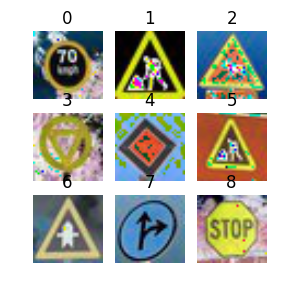

[ 4 25 31 13 12 25 35 36 14]


In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Defining additional images taken from internet
def newtestdata():
    testdir = os.path.join(os.getcwd(), 'test')
    X_new = []
    for filename in os.listdir(testdir):
        fn = os.path.join(testdir, filename)
        #print(fn)
        img = cv2.imread(fn)
        img = img.astype(np.float32)
        #print(img.shape)
        X_new.append(img)

    X_new = np.asarray(X_new)
    #print(testimgs.shape)

    plt.figure(1, (3,3))
    for i in range(len(X_new)):
        plt.subplot(3,3,i+1)
        plt.imshow(X_new[i])
        plt.title(i)
        plt.axis('off')
    
    plt.show()

    y_new = np.array([4, 25, 31, 13, 12, 25, 35, 36, 14])
    return X_new, y_new

X_new, y_new = newtestdata()
print(y_new)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Chose 9 images containing training signs from internet and tried to predit it using the trained model.
Resized all the images manually to 32x32 pixels size and they are plotted above.

1) 70Kmph Speed Limit sign - It is not having a standard big numbers of 70, instead it is having a smaller digits with the kmph unit and the digits are positioned in the upper half of the cirlce.

2) Chose an Yield traffic sign where there is no background. In other words, it is not a sticker on plate, it is the yield shape made up of a steel ribbon.

3) Chose a Wild animal crossing traffic sign showing a rabbit image.  In general, the wild animal crossing traffic signs varies drastically depending on the habitats of that locality.

4) Chose two instances of Road Work traffic signs, one is very clear and the other one is with backgrounds.  Both of them should be easy to determine

5) Chose a Priority Road ahead sign which is just a diamond shape with a border. Should be straight forward to detect. And chose few more straight forward ones.

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

X_new, y_new = newtestdata()
print(y_new)
ckptfn = 'lenet_german_traffic_sign'
modelfn = os.path.join(os.getcwd(), ckptfn)

with tf.Session() as sess:
    saver.restore(sess, modelfn)
    print('Model restored with latest weights and validation accuracy', validation_accuracy)
    x = tf.placeholder(tf.float32, [None, 32, 32, 3])
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    y_logits = myCnn(x)
    y_predictions = tf.nn.softmax(y_logits)
    y_predictions_vals = sess.run(y_predictions, feed_dict={x: X_new})
    
    print("Predicted values & actual values are")
    print(np.argmax(y_predictions_vals, 1))
    print(y_new)

    correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_new, y:y_new})
    print('Accuracy', accuracy)
    

ValueError: No variables to save

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The trained model didn't predicted well on the 9 images chosen from internet.  It predicted only 2 traffic signs correctly out of 9, so the accuracy is just 22%. It found the Yield sign and the Priority road ahead sign. It indicates that it predicted only the signs that are not having any details in the middle. i.e. it has predicted the signs that has only a well defined basic shapes (triange in circles = yield, slighted rotated square = priority road ahead symbol).  Looks like it is indicating that we are losing some of features that could help the model to detect the details at the middle.

In [107]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.